In [3]:
# 페이지를 요청하는 라이브러리
# Python으로 HTML을 다루는 라이브러리
# pandas 라이브러리
# time 라이브러리

In [4]:
from bs4 import BeautifulSoup # HTML 다루는 기능
import requests
import pandas as pd
import time

In [5]:
url = requests.get('https://search.daum.net/search?w=tot&DA=YZR&t__nil_searchbox=btn&q=%EB%A1%9C%EB%98%90')

In [6]:
# 200 : 정상 (충돌x)
# 400 : 존재하지 않는 페이지, 삭제된 페이지
# 500 : 비공개 페이지 or 제한된 페이지 (로그인 등)
url

<Response [200]>

In [7]:
url.text #가져온 정보들을 볼 수 있음.
#html 소스코드들을 가져와서 문자열로 반환

'<!doctype html>\n<html xmlns="http://www.w3.org/1999/xhtml" lang="ko">\n<head profile="http://a9.com/-/spec/opensearch/1.1/">\n<meta http-equiv="content-Type" content="text/html;charset=utf-8" />\n<meta http-equiv="X-UA-Compatible" content="IE=edge" />\n<meta name="autocomplete" content="off" />\n<meta name="referrer" content="always">\n<meta name="format-detection" content="telephone=no" />\n<meta property="og:title" content="로또 &ndash; Daum 검색" />\n<meta property="og:url" content="https://search.daum.net/search?w=tot&amp;DA=YZR&amp;t__nil_searchbox=btn&amp;q=%EB%A1%9C%EB%98%90" />\n<meta property="og:description" content="Daum 검색에서 로또에 대한 최신정보를 찾아보세요." />\n<meta property="og:image" content="https://search1.daumcdn.net/search/statics/common/img/og_search_20240403.png" />\n<meta property="og:site_name" content="다음검색" />\n<title>로또 &ndash; Daum 검색</title>\n<link rel="search" type="application/opensearchdescription+xml" href="//search.daum.net/OpenSearch.xml" title="Daum">\n<link rel="s

In [8]:
html = BeautifulSoup(url.text) #다루기 편하게 변환

In [9]:
html.find('span', class_ = 'f_red') #span이라는 태그명에 f_red라는 클래스를 찾기

<span class="f_red">1140회</span>

In [10]:
#알맹이만 가져오기
# 마지막 '회' 제외
# int로 변경
current = int(html.find('span', class_ = 'f_red').text[:-1]) 
current

1140

## 로또 번호 가져오기

In [44]:
div_lotto = html.find('div', class_ = 'lottonum').text.split(' ')
div_lotto
lotto_num = div_lotto[1:7]
lotto_num.append(div_lotto[-2])
lotto_num

['5', '12', '15', '30', '37', '40', '18']

In [11]:
numbers = html.find('div', class_ = 'lottonum').find_all('span')

In [13]:
def make_numbers(html):
    numbers = html.find('div', class_ = 'lottonum').find_all('span')
    del numbers[-3:-1]

    box = []
    for i in numbers:
        box.append(int(i.text))

    return box

In [19]:
make_numbers(html)

[7, 10, 22, 29, 31, 38, 15]

# 다른회차 가져와보기

In [47]:
import random

total = []
for n in range(1, 21):
    url = requests.get(f'https://search.daum.net/search?w=tot&rtmaxcoll=LOT&DA=LOT&q={n}%ED%9A%8C%20%EB%A1%9C%EB%98%90%EB%8B%B9%EC%B2%A8%EB%B2%88%ED%98%B8')
    html = BeautifulSoup(url.text)
    numbers = make_numbers(html)
    total.append(numbers)
    time.sleep(random.random() + 1) # 1.x초 만큼 멈춰라.
    #규칙적으로 1초당 한번씩 가져오면 그것도 막힘.
    print(f'{n}회 로또 데이터 수집 완료 : {numbers}')

1회 로또 데이터 수집 완료 : [10, 23, 29, 33, 37, 40, 16]
2회 로또 데이터 수집 완료 : [9, 13, 21, 25, 32, 42, 2]
3회 로또 데이터 수집 완료 : [11, 16, 19, 21, 27, 31, 30]
4회 로또 데이터 수집 완료 : [14, 27, 30, 31, 40, 42, 2]
5회 로또 데이터 수집 완료 : [16, 24, 29, 40, 41, 42, 3]
6회 로또 데이터 수집 완료 : [14, 15, 26, 27, 40, 42, 34]
7회 로또 데이터 수집 완료 : [2, 9, 16, 25, 26, 40, 42]
8회 로또 데이터 수집 완료 : [8, 19, 25, 34, 37, 39, 9]
9회 로또 데이터 수집 완료 : [2, 4, 16, 17, 36, 39, 14]
10회 로또 데이터 수집 완료 : [9, 25, 30, 33, 41, 44, 6]
11회 로또 데이터 수집 완료 : [1, 7, 36, 37, 41, 42, 14]
12회 로또 데이터 수집 완료 : [2, 11, 21, 25, 39, 45, 44]
13회 로또 데이터 수집 완료 : [22, 23, 25, 37, 38, 42, 26]
14회 로또 데이터 수집 완료 : [2, 6, 12, 31, 33, 40, 15]
15회 로또 데이터 수집 완료 : [3, 4, 16, 30, 31, 37, 13]
16회 로또 데이터 수집 완료 : [6, 7, 24, 37, 38, 40, 33]
17회 로또 데이터 수집 완료 : [3, 4, 9, 17, 32, 37, 1]
18회 로또 데이터 수집 완료 : [3, 12, 13, 19, 32, 35, 29]
19회 로또 데이터 수집 완료 : [6, 30, 38, 39, 40, 43, 26]
20회 로또 데이터 수집 완료 : [10, 14, 18, 20, 23, 30, 41]


In [48]:
lotto = pd.DataFrame(total, columns = ['1번째','2번째','3번째','4번째','5번째','6번째','보너스'])
lotto.to_excel('lotto.xlsx', index= False)
lotto

,1번째,2번째,3번째,4번째,5번째,6번째,보너스
0,10,23,29,33,37,40,16
1,9,13,21,25,32,42,2
2,11,16,19,21,27,31,30
3,14,27,30,31,40,42,2
4,16,24,29,40,41,42,3
5,14,15,26,27,40,42,34
6,2,9,16,25,26,40,42
7,8,19,25,34,37,39,9
8,2,4,16,17,36,39,14
9,9,25,30,33,41,44,6


# 실습

In [4]:
url = requests.get('https://search.daum.net/search?nil_suggest=btn&w=tot&DA=SBC&q=%EC%97%B0%EA%B8%88%EB%B3%B5%EA%B6%8C')

In [5]:
html = BeautifulSoup(url.text)

In [6]:
def make_num(html):
    num = html.find('tr', class_='fst').text
    num = num.split(' ')
    del num[-3:]
    del num[:6]
    del num[1:3]
    return num

In [8]:
import random

total = []
for n in range(1, 231):
    url = requests.get(f'https://search.daum.net/search?w=tot&DA=JIM&rtmaxcoll=JIM&&q=%EC%97%B0%EA%B8%88%EB%B3%B5%EA%B6%8C%20720%2B%20{n}%ED%9A%8C%EC%B0%A8')
    html = BeautifulSoup(url.text)
    numbers = make_num(html)
    total.append(numbers)
    time.sleep(random.random() + 1) # 1.x초 만큼 멈춰라.
    #규칙적으로 1초당 한번씩 가져오면 그것도 막힘.
    print(f'{n}회 연금 복권 데이터 수집 완료: {numbers}')

1회 연금 복권 데이터 수집 완료: ['4조', '1', '6', '2', '1', '3', '2']
2회 연금 복권 데이터 수집 완료: ['2조', '4', '5', '0', '5', '5', '8']
3회 연금 복권 데이터 수집 완료: ['4조', '5', '4', '4', '9', '5', '5']
4회 연금 복권 데이터 수집 완료: ['4조', '1', '2', '4', '4', '2', '0']
5회 연금 복권 데이터 수집 완료: ['4조', '7', '5', '4', '6', '5', '5']
6회 연금 복권 데이터 수집 완료: ['5조', '1', '9', '3', '2', '0', '2']
7회 연금 복권 데이터 수집 완료: ['2조', '5', '9', '7', '0', '9', '3']
8회 연금 복권 데이터 수집 완료: ['4조', '2', '3', '4', '0', '5', '8']
9회 연금 복권 데이터 수집 완료: ['3조', '1', '3', '3', '5', '1', '0']
10회 연금 복권 데이터 수집 완료: ['2조', '7', '7', '0', '1', '7', '3']
11회 연금 복권 데이터 수집 완료: ['1조', '8', '6', '7', '6', '5', '4']
12회 연금 복권 데이터 수집 완료: ['5조', '0', '7', '6', '6', '7', '6']
13회 연금 복권 데이터 수집 완료: ['1조', '6', '6', '9', '2', '4', '5']
14회 연금 복권 데이터 수집 완료: ['3조', '4', '3', '2', '4', '9', '6']
15회 연금 복권 데이터 수집 완료: ['4조', '4', '7', '7', '2', '3', '8']
16회 연금 복권 데이터 수집 완료: ['4조', '6', '6', '4', '0', '5', '6']
17회 연금 복권 데이터 수집 완료: ['3조', '3', '1', '7', '2', '2', '7']
18회 연금 복권 데이터 수집 완료: ['

142회 연금 복권 데이터 수집 완료: ['2조', '8', '5', '2', '9', '6', '0']
143회 연금 복권 데이터 수집 완료: ['5조', '4', '5', '9', '9', '7', '9']
144회 연금 복권 데이터 수집 완료: ['5조', '8', '4', '9', '6', '8', '1']
145회 연금 복권 데이터 수집 완료: ['2조', '2', '2', '1', '1', '1', '1']
146회 연금 복권 데이터 수집 완료: ['1조', '6', '4', '3', '5', '7', '0']
147회 연금 복권 데이터 수집 완료: ['4조', '8', '3', '8', '3', '8', '0']
148회 연금 복권 데이터 수집 완료: ['1조', '8', '2', '6', '9', '3', '0']
149회 연금 복권 데이터 수집 완료: ['5조', '3', '7', '8', '2', '9', '6']
150회 연금 복권 데이터 수집 완료: ['3조', '3', '6', '5', '3', '4', '3']
151회 연금 복권 데이터 수집 완료: ['4조', '2', '5', '6', '5', '0', '2']
152회 연금 복권 데이터 수집 완료: ['3조', '9', '0', '5', '5', '3', '1']
153회 연금 복권 데이터 수집 완료: ['1조', '9', '7', '7', '0', '3', '8']
154회 연금 복권 데이터 수집 완료: ['3조', '8', '2', '6', '3', '9', '3']
155회 연금 복권 데이터 수집 완료: ['4조', '7', '3', '9', '5', '8', '6']
156회 연금 복권 데이터 수집 완료: ['1조', '0', '7', '1', '7', '1', '2']
157회 연금 복권 데이터 수집 완료: ['5조', '2', '4', '3', '4', '3', '0']
158회 연금 복권 데이터 수집 완료: ['2조', '3', '5', '7', '8', '5', '6

AttributeError: 'NoneType' object has no attribute 'text'

In [103]:
lotto2 = pd.DataFrame(total, columns = ['당첨조','1번째','2번째','3번째','4번째','5번째','6번째'])
lotto2.to_excel('lotto2.xlsx', index= False)
lotto2

,당첨조,1번째,2번째,3번째,4번째,5번째,6번째
0,4조,1,6,2,1,3,2
1,2조,4,5,0,5,5,8
2,4조,5,4,4,9,5,5
3,4조,1,2,4,4,2,0
4,4조,7,5,4,6,5,5
...,...,...,...,...,...,...,...
224,3조,2,4,5,9,1,4
225,1조,5,0,2,2,7,5
226,5조,0,6,8,5,1,6
227,4조,1,2,7,3,1,7


3. 데이터 분석
분석 1: 각 조의 출현 횟수 구하기
• 목표: 각 조가 나온 횟수를 계산합니다.
- ex. 1조 : 35회, 2조 : 70회 …
• 분석 방법:
o 수집한 데이터에서 조 정보를 추출합니다.
o 조별로 출현 횟수를 집계합니다.
• 결과 표시:
o 막대 그래프 등 적절한 차트를 사용하여 시각화합니다.

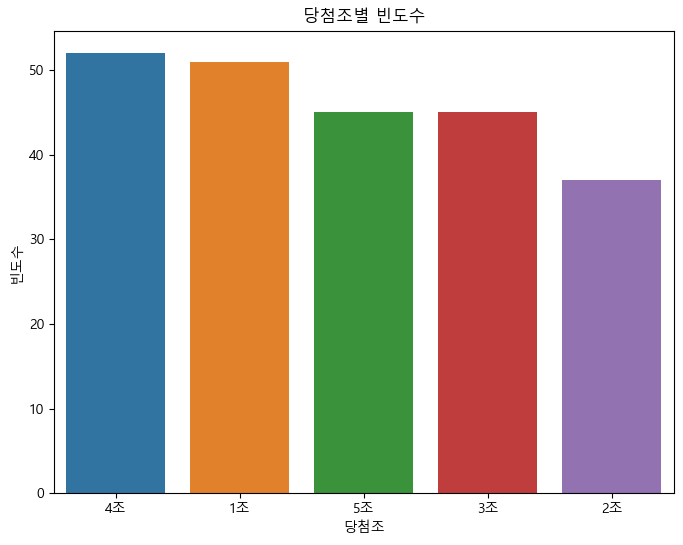

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
# 환경설정
import matplotlib
# 한글 설치
matplotlib.rc('font', family = 'Malgun Gothic')

cs = lotto2['당첨조'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=cs.index, y=cs.values)
plt.title('당첨조별 빈도수')
plt.xlabel('당첨조')
plt.ylabel('빈도수')
plt.show()

### 분석 2: 현재 가장 오랫동안 나오지 않은 끝번호 / 역대 가장 오랫동안 나오지 않은 끝번호 찾기
- • 목표: 마지막으로 나온 이후 가장 오래동안 출현하지 않은 끝번호(0~9)와 역대 가장 오랫
동안 나오지 않은 끝번호를 찾습니다.
- • 분석 방법:
    - o 각 회차의 당첨번호 끝자리를 추출합니다.
    - o 끝번호별로 마지막 출현 회차를 기록합니다.

In [ ]:
final = {}
for idx, val in enumerate(lotto2['6번째']):
    final[val] = idx

In [128]:
final

{'2': 214,
 '8': 217,
 '5': 225,
 '0': 228,
 '3': 223,
 '4': 224,
 '6': 226,
 '7': 227,
 '9': 229,
 '1': 173}

In [131]:
temp = 230 - final['1']
print(f'1번의 경우 {temp}주째 나오지 않고 있습니다')

1번의 경우 57주째 나오지 않고 있습니다


In [151]:
final2 = {}

for i in range(10):
    
    num = str(i)
    idx = lotto2[lotto2['6번째'] == num]['6번째'].index.to_list()


    diff = []

    for i in range(len(idx)):

        if i == 0:
            diff.append(0)
        else:
            diff.append(idx[i] - idx[i - 1])
    final2[num] = max(diff)

In [152]:
final2

{'0': 51,
 '1': 21,
 '2': 28,
 '3': 36,
 '4': 44,
 '5': 50,
 '6': 27,
 '7': 33,
 '8': 27,
 '9': 44}

In [156]:
temp = final2['0']
print(f'0번의 경우 {temp}주째 나오지 않고 있습니다')

0번의 경우 51주째 나오지 않고 있습니다
